## Import Requisite Libraries

In [1]:
import pandas as pd
import numpy as np
import os

## Ensure Directory

In [2]:
from eda_toolkit import ensure_directory

base_path = os.path.join(os.pardir)

# Go up one level from 'notebooks' to parent directory,
# then into the 'data' folder
data_path = os.path.join(os.pardir, "data")
data_output = os.path.join(os.pardir, "data_output")

# create image paths
image_path_png = os.path.join(base_path, "images", "png_images")
image_path_svg = os.path.join(base_path, "images", "svg_images")

# Use the function to ensure'data' directory exists
ensure_directory(data_path)
ensure_directory(data_output)
ensure_directory(image_path_png)
ensure_directory(image_path_svg)

Directory exists: ../data
Directory exists: ../data_output
Directory exists: ../images/png_images
Directory exists: ../images/svg_images


## UCI ML Repository

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# Combine X and y into entire df
df = X.join(y, how="inner")

## Binning Numerical Columns

In [4]:
bin_ages = [
    0,
    18,
    30,
    40,
    50,
    60,
    70,
    80,
    90,
    100,
    float("inf"),
]

In [5]:
label_ages = [
    "< 18",
    "18-29",
    "30-39",
    "40-49",
    "50-59",
    "60-69",
    "70-79",
    "80-89",
    "90-99",
    "100 +",
]

In [6]:
df["age_group"] = pd.cut(
    df["age"],
    bins=bin_ages,
    labels=label_ages,
    right=False,
)

## KDE and Histograms

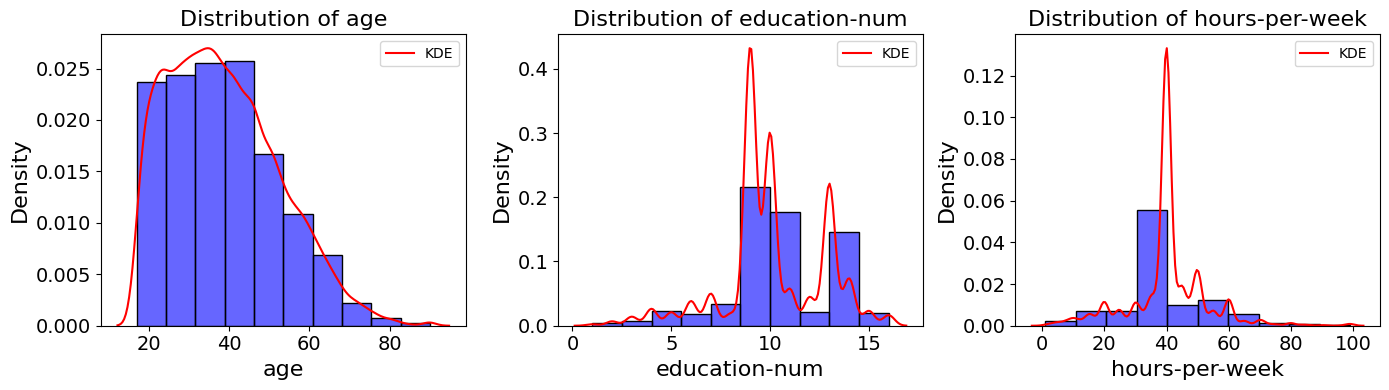

In [7]:
from eda_toolkit import kde_distributions

vars_of_interest = [
    "age",
    "education-num",
    "hours-per-week",
]

kde_distributions(
    df=df,
    n_rows=1,
    n_cols=3,
    grid_figsize=(14, 4),  # Size of the overall grid figure
    fill=True,
    fill_alpha=0.60,
    text_wrap=50,
    bbox_inches="tight",
    vars_of_interest=vars_of_interest,
    y_axis_label="Density",
    bins=10,
    plot_type="both",  # Can also just plot KDE by itself by passing "kde"
    label_fontsize=16,  # Font size for axis labels
    tick_fontsize=14,  # Font size for tick labels
    image_filename="age_distribution_kde",
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
)

### Histogram Example (Density)

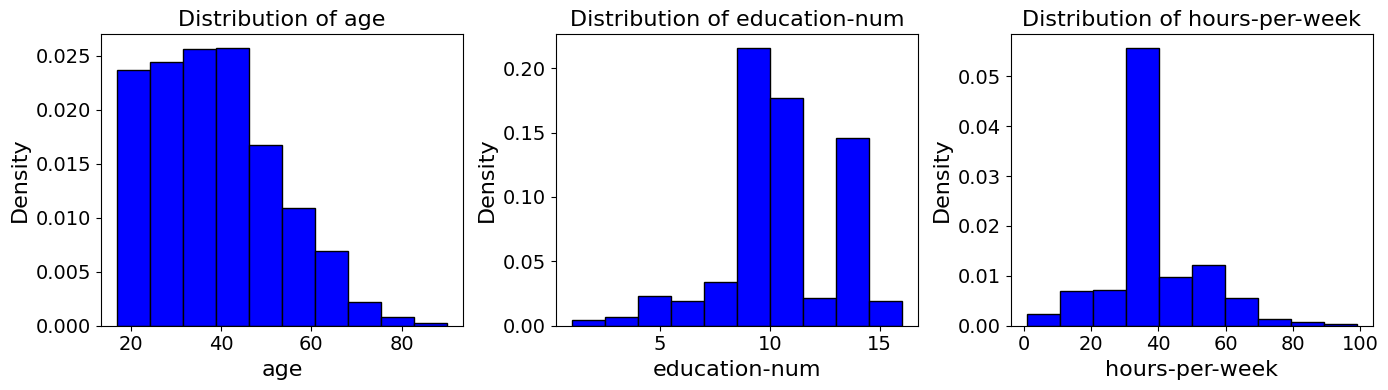

In [8]:
from eda_toolkit import kde_distributions

vars_of_interest = [
    "age",
    "education-num",
    "hours-per-week",
]

kde_distributions(
    df=df,
    n_rows=1,
    n_cols=3,
    grid_figsize=(14, 4),  # Size of the overall grid figure
    fill=True,
    text_wrap=50,
    bbox_inches="tight",
    vars_of_interest=vars_of_interest,
    y_axis_label="Density",
    bins=10,
    plot_type="hist",
    label_fontsize=16,  # Font size for axis labels
    tick_fontsize=14,  # Font size for tick labels
    image_filename="age_distribution_density",
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
)

### Histogram Example (Count)

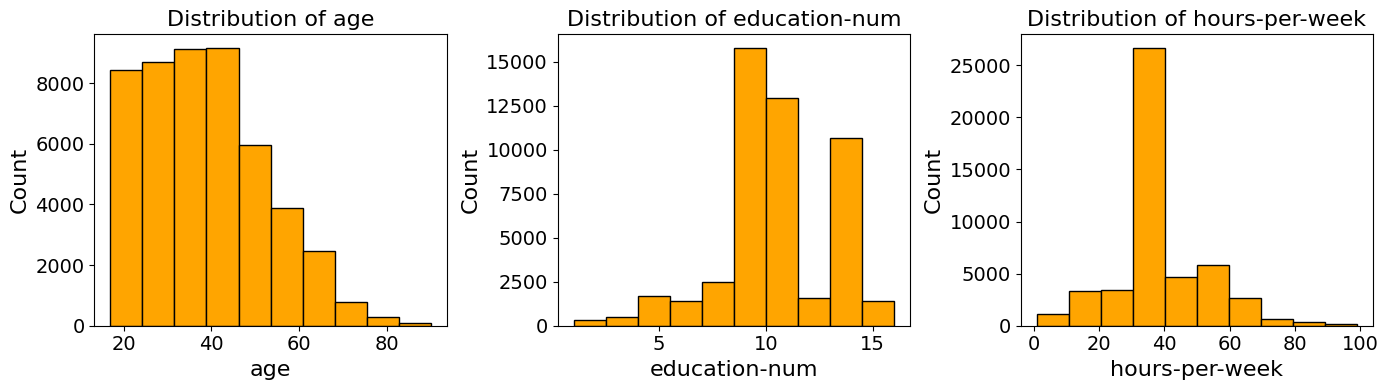

In [9]:
from eda_toolkit import kde_distributions

vars_of_interest = [
    "age",
    "education-num",
    "hours-per-week",
]

kde_distributions(
    df=df,
    n_rows=1,
    n_cols=3,
    grid_figsize=(14, 4),  # Size of the overall grid figure
    text_wrap=50,
    hist_color="orange",
    bbox_inches="tight",
    vars_of_interest=vars_of_interest,
    y_axis_label="Count",
    bins=10,
    plot_type="hist",
    stat="Count",
    label_fontsize=16,  # Font size for axis labels
    tick_fontsize=14,  # Font size for tick labels
    image_filename="age_distribution_count",
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
)

### Histogram Example - (Mean and Median)

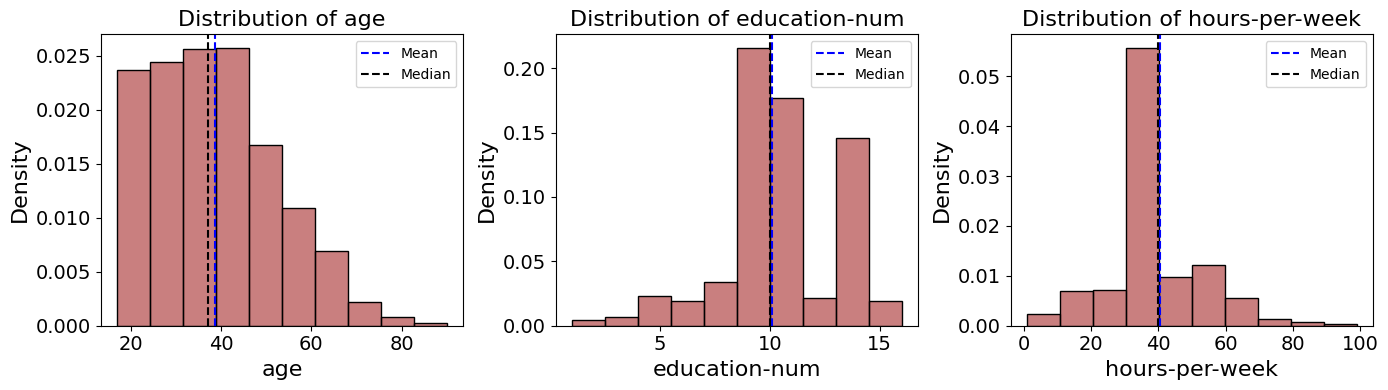

In [10]:
from eda_toolkit import kde_distributions

vars_of_interest = [
    "age",
    "education-num",
    "hours-per-week",
]

kde_distributions(
    df=df,
    n_rows=1,
    n_cols=3,
    grid_figsize=(14, 4),  # Size of the overall grid figure
    text_wrap=50,
    hist_color="brown",
    bbox_inches="tight",
    vars_of_interest=vars_of_interest,
    y_axis_label="Density",
    bins=10,
    fill_alpha=0.60,
    plot_type="hist",
    stat="Density",
    label_fontsize=16,  # Font size for axis labels
    tick_fontsize=14,  # Font size for tick labels
    plot_mean=True,
    plot_median=True,
    mean_color="blue",
    image_filename="age_distribution_mean_median",
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
)

### Histogram Example - (Mean, Median, and Std. Deviation)

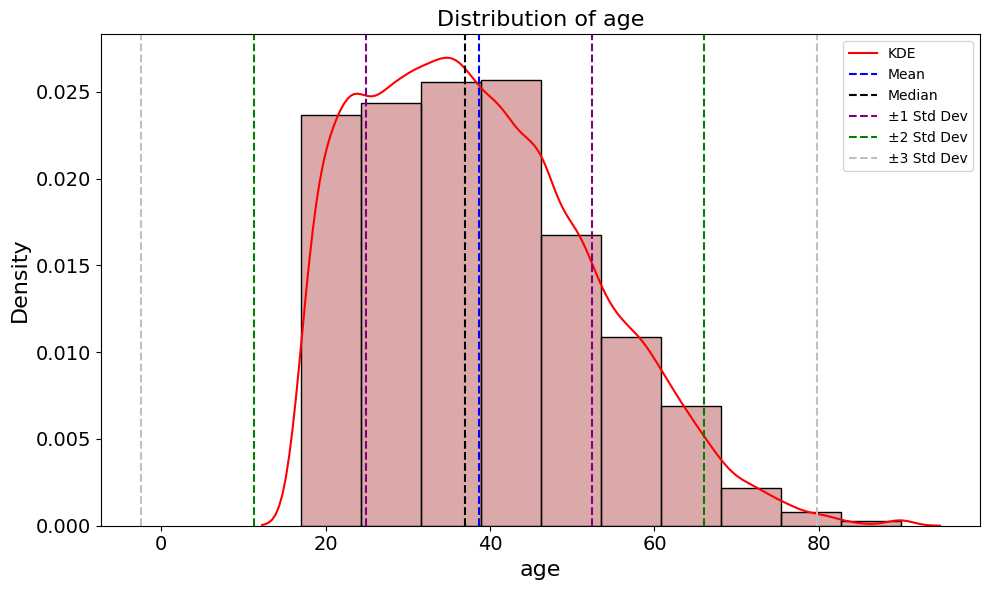

In [11]:
from eda_toolkit import kde_distributions

vars_of_interest = [
    "age",
]

kde_distributions(
    df=df,
    figsize=(10, 6),
    text_wrap=50,
    hist_color="brown",
    bbox_inches="tight",
    vars_of_interest=vars_of_interest,
    y_axis_label="Density",
    bins=10,
    fill_alpha=0.40,
    plot_type="both",
    stat="Density",
    label_fontsize=16,  # Font size for axis labels
    tick_fontsize=14,  # Font size for tick labels
    plot_mean=True,
    plot_median=True,
    mean_color="blue",
    image_path_svg=image_path_svg,
    image_path_png=image_path_png,
    std_dev_levels=[
        1,
        2,
        3,
    ],
    std_color=[
        "purple",
        "green",
        "silver",
    ],
    image_filename="age_distribution_mean_median_std",
)

## Feature Scaling and Outliers

### Box-Cox Transformation Example 1

In [12]:
from eda_toolkit import data_doctor

             DATA DOCTOR SUMMARY REPORT             
+------------------------------+--------------------+
| Feature                      | age                |
+------------------------------+--------------------+
| Statistic                    | Value              |
+------------------------------+--------------------+
| Min                          |             3.6664 |
| Max                          |             6.8409 |
| Mean                         |             5.0163 |
| Median                       |             5.0333 |
| Std Dev                      |             0.6761 |
+------------------------------+--------------------+
| Quartile                     | Value              |
+------------------------------+--------------------+
| Q1 (25%)                     |             4.5219 |
| Q2 (50% = Median)            |             5.0333 |
| Q3 (75%)                     |             5.5338 |
| IQR                          |             1.0119 |
+----------------------------

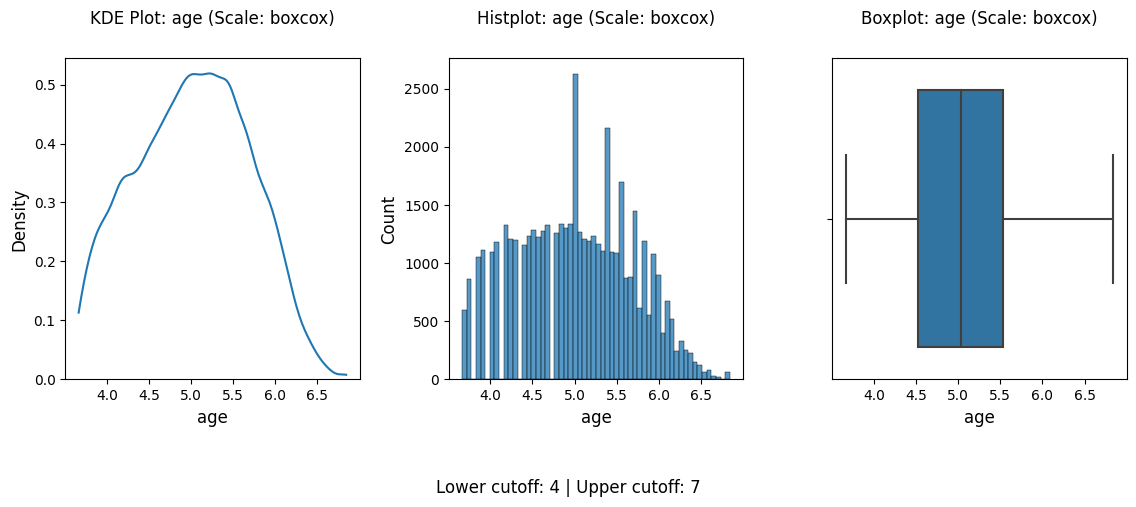

In [13]:
data_doctor(
    df=df,
    feature_name="age",
    data_fraction=0.6,
    scale_conversion="boxcox",
    apply_cutoff=False,
    lower_cutoff=None,
    upper_cutoff=None,
    show_plot=True,
    apply_as_new_col_to_df=True,
    random_state=111,
    figsize=(10, 3),
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    save_plot=True,
)

In [14]:
df.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income age_group  \
0          2174             0              40  United-States  <=50K     30-39   
1             0             0              13  United-States  <=50K     50-59   
2             0             0              40  United-States  <=50K     30-39   
3             0             0              40  United-States  <=50K     50-59   
4             0             0              40           Cuba  <=50K     18-29   

   age_boxcox  
0    5.180807  
1    5.912323  
2    5.227960  
3    6.389562  
4    3.850675

### Box-Cox Transformation Example 2

             DATA DOCTOR SUMMARY REPORT             
+------------------------------+--------------------+
| Feature                      | age                |
+------------------------------+--------------------+
| Statistic                    | Value              |
+------------------------------+--------------------+
| Min                          |             3.6664 |
| Max                          |             6.8409 |
| Mean                         |             5.0163 |
| Median                       |             5.0333 |
| Std Dev                      |             0.6761 |
+------------------------------+--------------------+
| Quartile                     | Value              |
+------------------------------+--------------------+
| Q1 (25%)                     |             4.5219 |
| Q2 (50% = Median)            |             5.0333 |
| Q3 (75%)                     |             5.5338 |
| IQR                          |             1.0119 |
+----------------------------

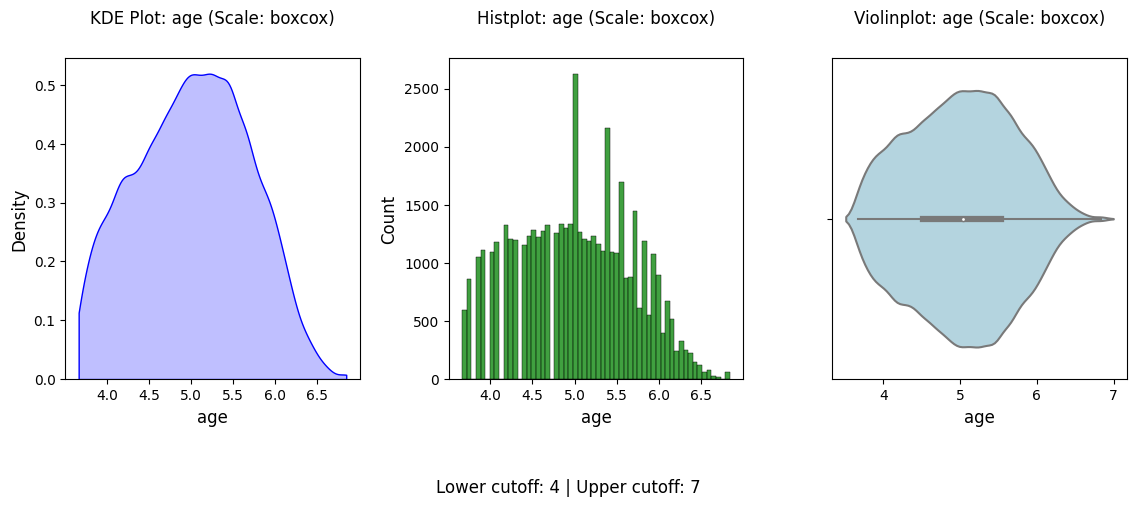

In [15]:
data_doctor(
    df=df,
    feature_name="age",
    data_fraction=1,
    scale_conversion="boxcox",
    apply_cutoff=False,
    lower_cutoff=None,
    upper_cutoff=None,
    show_plot=True,
    apply_as_new_col_to_df=True,
    scale_conversion_kws={"alpha": 0.8},
    box_violin="violinplot",
    box_violin_kws={"color": "lightblue"},
    kde_kws={"fill": True, "color": "blue"},
    hist_kws={"color": "green"},
    random_state=111,
    figsize=(10, 3),
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    save_plot=True,
)

### Retaining a Sample for Analysis

In [16]:
sampled_df = df.sample(frac=0.6, random_state=111)

In [17]:
sampled_df.head()

age workclass  fnlwgt     education  education-num      marital-status  \
31652   40   Private  132222  Some-college             10  Married-civ-spouse   
20931   58   Private   68624       HS-grad              9  Married-civ-spouse   
38653   41   Private  161880       HS-grad              9           Separated   
32939   73       NaN   73402  Some-college             10  Married-civ-spouse   
17673   19   Private   97261       HS-grad              9       Never-married   

              occupation   relationship   race   sex  capital-gain  \
31652  Machine-op-inspct        Husband  White  Male          4386   
20931    Exec-managerial        Husband  White  Male             0   
38653  Machine-op-inspct  Not-in-family  Black  Male             0   
32939                NaN        Husband  White  Male             0   
17673    Farming-fishing  Not-in-family  White  Male             0   

       capital-loss  hours-per-week native-country  income age_group  \
31652             0              50  United-States    >50K     40-49   
20931             0              45  United-States   <=50K     50-59   
38653             0              50  United-States  <=50K.     40-49   
32939             0              10  United-States  <=50K.     70-79   
17673             0              40  United-States   <=50K     18-29   

       age_boxcox  
31652    4.584927  
20931    5.363943  
38653    4.019590  
32939    5.730449  
17673    4.019590

In [18]:
print(
    f"The sampled dataframe has {sampled_df.shape[0]} rows and {sampled_df.shape[1]} columns."
)

The sampled dataframe has 29305 rows and 17 columns.


### Plain Outliers Example

             DATA DOCTOR SUMMARY REPORT             
+------------------------------+--------------------+
| Feature                      | fnlwgt             |
+------------------------------+--------------------+
| Statistic                    | Value              |
+------------------------------+--------------------+
| Min                          |        12,285.0000 |
| Max                          |     1,484,705.0000 |
| Mean                         |       189,181.3719 |
| Median                       |       177,955.0000 |
| Std Dev                      |       105,417.5713 |
+------------------------------+--------------------+
| Quartile                     | Value              |
+------------------------------+--------------------+
| Q1 (25%)                     |       117,292.0000 |
| Q2 (50% = Median)            |       177,955.0000 |
| Q3 (75%)                     |       236,769.0000 |
| IQR                          |       119,477.0000 |
+----------------------------

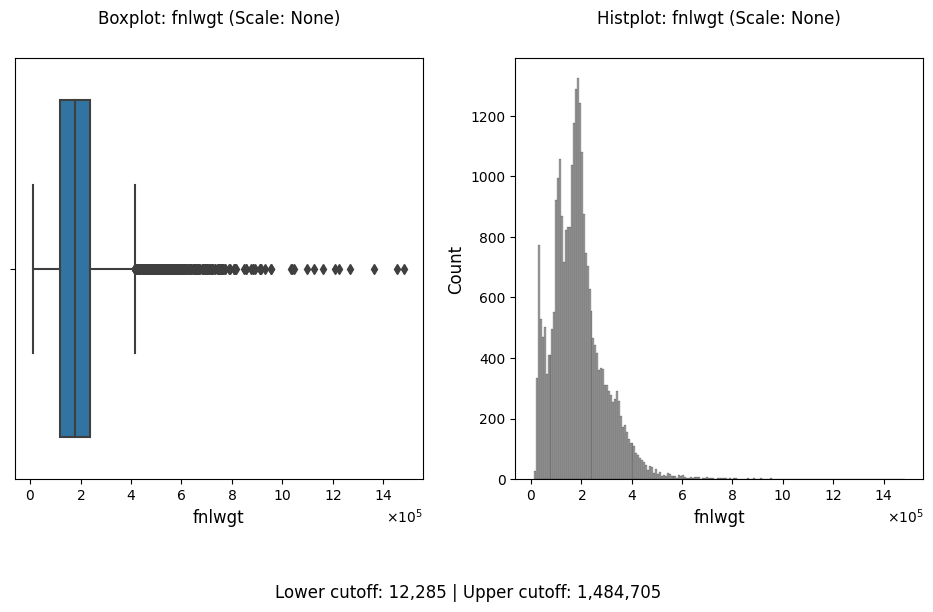

In [19]:
data_doctor(
    df=df,
    feature_name="fnlwgt",
    data_fraction=0.6,
    plot_type=["box_violin", "hist"],
    hist_kws={"color": "gray"},
    figsize=(8, 4),
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    save_plot=True,
    random_state=111,
)

### Treated Outliers With Cutoffs

             DATA DOCTOR SUMMARY REPORT             
+------------------------------+--------------------+
| Feature                      | fnlwgt             |
+------------------------------+--------------------+
| Statistic                    | Value              |
+------------------------------+--------------------+
| Min                          |        12,285.0000 |
| Max                          |       400,000.0000 |
| Mean                         |       186,168.8334 |
| Median                       |       178,144.5000 |
| Std Dev                      |        93,915.4174 |
+------------------------------+--------------------+
| Quartile                     | Value              |
+------------------------------+--------------------+
| Q1 (25%)                     |       117,550.5000 |
| Q2 (50% = Median)            |       178,144.5000 |
| Q3 (75%)                     |       237,642.0000 |
| IQR                          |       120,091.5000 |
+----------------------------

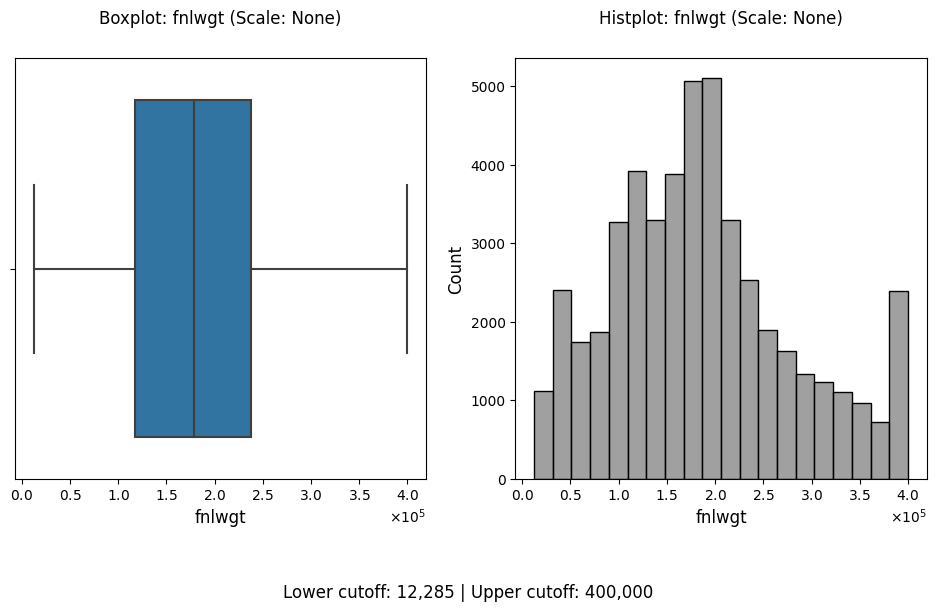

In [20]:
data_doctor(
    df=df,
    feature_name="fnlwgt",
    data_fraction=0.6,
    apply_as_new_col_to_df=True,
    apply_cutoff=True,
    upper_cutoff=400000,
    plot_type=["box_violin", "hist"],
    hist_kws={"color": "gray", "bins": 20},
    figsize=(8, 4),
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    save_plot=True,
    random_state=111,
)

### RobustScaler Outliers Examples

             DATA DOCTOR SUMMARY REPORT             
+------------------------------+--------------------+
| Feature                      | age                |
+------------------------------+--------------------+
| Statistic                    | Value              |
+------------------------------+--------------------+
| Min                          |             0.4722 |
| Max                          |             2.5000 |
| Mean                         |             1.0734 |
| Median                       |             1.0278 |
| Std Dev                      |             0.3808 |
+------------------------------+--------------------+
| Quartile                     | Value              |
+------------------------------+--------------------+
| Q1 (25%)                     |             0.7778 |
| Q2 (50% = Median)            |             1.0278 |
| Q3 (75%)                     |             1.3333 |
| IQR                          |             0.5556 |
+----------------------------

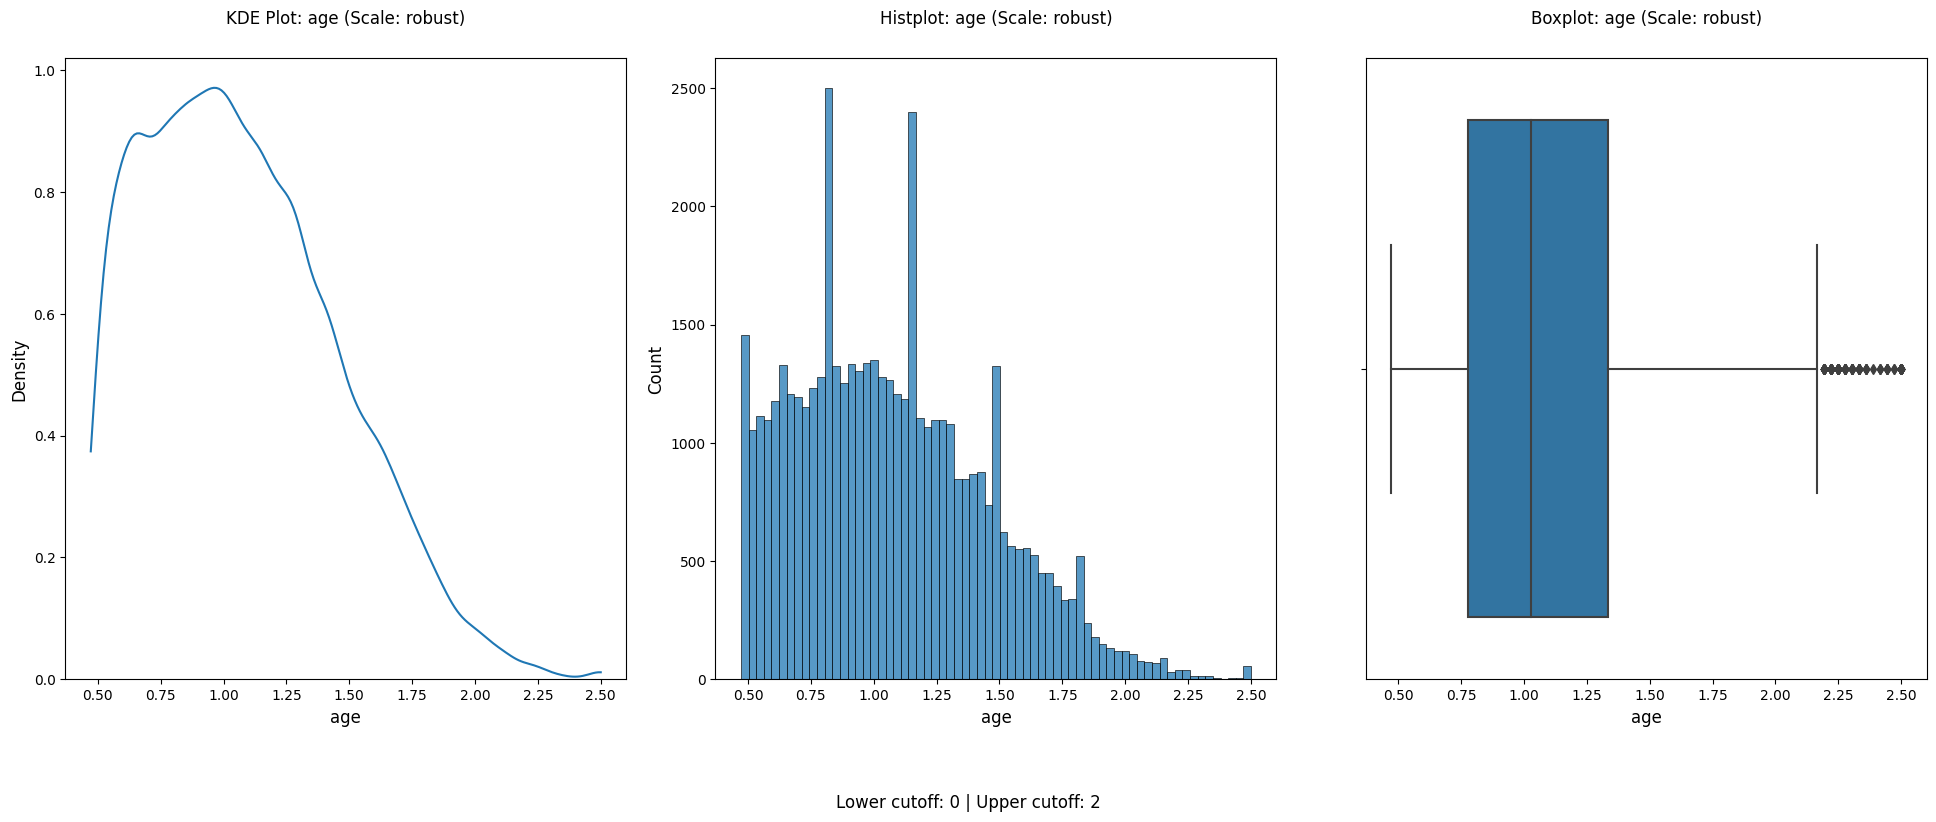

In [21]:
data_doctor(
    df=df,
    feature_name="age",
    data_fraction=0.6,
    scale_conversion="robust",
    apply_as_new_col_to_df=True,
    scale_conversion_kws={
        "with_centering": False,  # Disable centering
        "quantile_range": (10.0, 90.0),  # Use a custom quantile range
    },
    random_state=111,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    save_plot=True,
)

## Stacked Crosstab Plots

### Stacked Bar Plots With Crosstabs Example

In [22]:
from eda_toolkit import strip_trailing_period

In [23]:
df = strip_trailing_period(df=df, column_name="income")

In [24]:
# Define the func_col to use in the loop in order of usage
func_col = ["sex", "income"]

# Define the legend_labels to use in the loop
legend_labels_list = [
    ["Male", "Female"],  # Corresponds to "sex"
    ["<=50K", ">50K"],  # Corresponds to "income"
]

# Define titles for the plots
title = [
    "Sex",
    "Income",
]

Plot saved as ../images/png_images/stacked_bar_sex.png
Plot saved as ../images/svg_images/stacked_bar_sex.svg


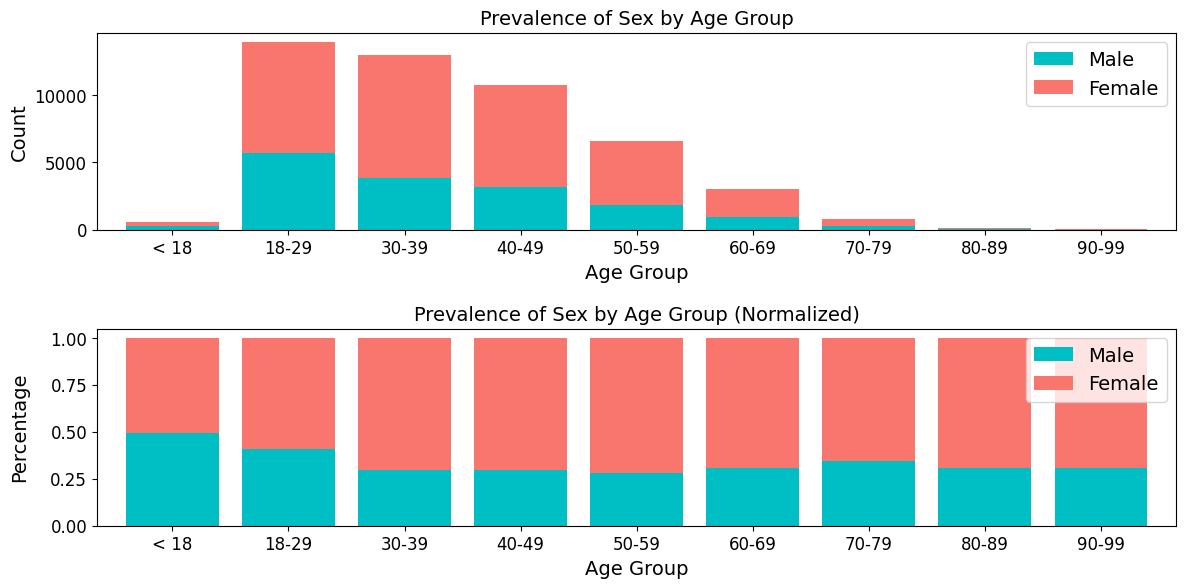

Plot saved as ../images/png_images/stacked_bar_income.png
Plot saved as ../images/svg_images/stacked_bar_income.svg


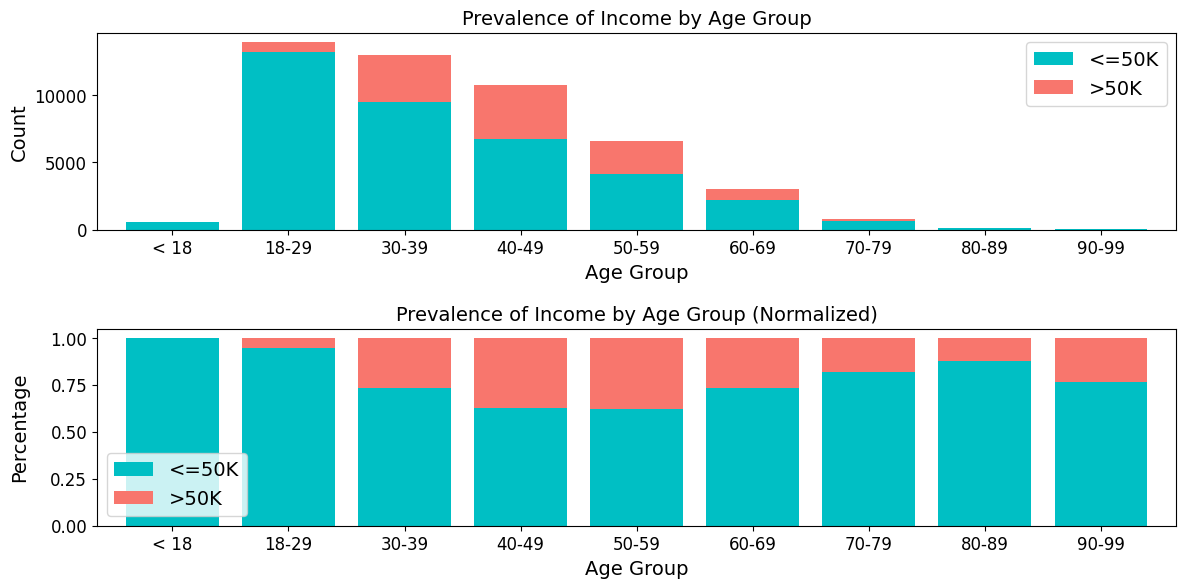


Crosstab for sex

sex         Male  Female  Total  Male_%  Female_%
age_group                                        
< 18         295     300    595   49.58     50.42
18-29       5707    8213  13920   41.00     59.00
30-39       3853    9076  12929   29.80     70.20
40-49       3188    7536  10724   29.73     70.27
50-59       1873    4746   6619   28.30     71.70
60-69        939    2115   3054   30.75     69.25
70-79        280     535    815   34.36     65.64
80-89         40      91    131   30.53     69.47
90-99         17      38     55   30.91     69.09
Total      16192   32650  48842   33.15     66.85


Crosstab for income

income     <=50K   >50K  Total  <=50K_%  >50K_%
age_group                                      
< 18         595      0    595   100.00    0.00
18-29      13174    746  13920    94.64    5.36
30-39       9468   3461  12929    73.23   26.77
40-49       6738   3986  10724    62.83   37.17
50-59       4110   2509   6619    62.09   37.91
60-69       2245    80

In [25]:
from eda_toolkit import stacked_crosstab_plot

# Call the stacked_crosstab_plot function
stacked_crosstabs = stacked_crosstab_plot(
    df=df,
    col="age_group",
    func_col=func_col,
    legend_labels_list=legend_labels_list,
    title=title,
    kind="bar",
    width=0.8,
    rot=0,  # axis rotation angle
    custom_order=None,
    color=["#00BFC4", "#F8766D"],  # default color schema
    output="both",
    return_dict=True,
    x=14,
    y=8,
    p=10,
    logscale=False,
    plot_type="both",
    show_legend=True,
    label_fontsize=14,
    tick_fontsize=12,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    file_prefix="stacked_bar",
    save_formats=["png", "svg"],
)

In [26]:
crosstab_age_sex = stacked_crosstabs["sex"]
crosstab_age_income = stacked_crosstabs["income"]

In [27]:
crosstab_age_sex

sex         Male  Female  Total  Male_%  Female_%
age_group                                        
< 18         295     300    595   49.58     50.42
18-29       5707    8213  13920   41.00     59.00
30-39       3853    9076  12929   29.80     70.20
40-49       3188    7536  10724   29.73     70.27
50-59       1873    4746   6619   28.30     71.70
60-69        939    2115   3054   30.75     69.25
70-79        280     535    815   34.36     65.64
80-89         40      91    131   30.53     69.47
90-99         17      38     55   30.91     69.09
Total      16192   32650  48842   33.15     66.85

In [28]:
crosstab_age_income

income     <=50K   >50K  Total  <=50K_%  >50K_%
age_group                                      
< 18         595      0    595   100.00    0.00
18-29      13174    746  13920    94.64    5.36
30-39       9468   3461  12929    73.23   26.77
40-49       6738   3986  10724    62.83   37.17
50-59       4110   2509   6619    62.09   37.91
60-69       2245    809   3054    73.51   26.49
70-79        668    147    815    81.96   18.04
80-89        115     16    131    87.79   12.21
90-99         42     13     55    76.36   23.64
Total      37155  11687  48842    76.07   23.93

### Non-Normalized Stacked Bar Plots Example

Plot saved as ../images/png_images/stacked_bar_non_normalized_sex.png
Plot saved as ../images/svg_images/stacked_bar_non_normalized_sex.svg


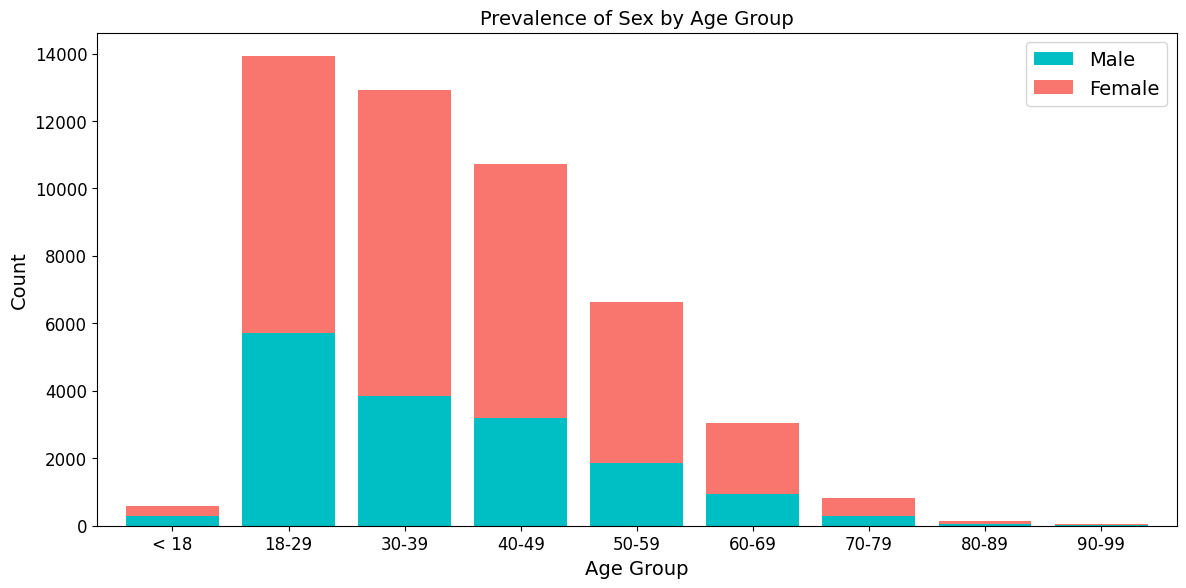

Plot saved as ../images/png_images/stacked_bar_non_normalized_income.png
Plot saved as ../images/svg_images/stacked_bar_non_normalized_income.svg


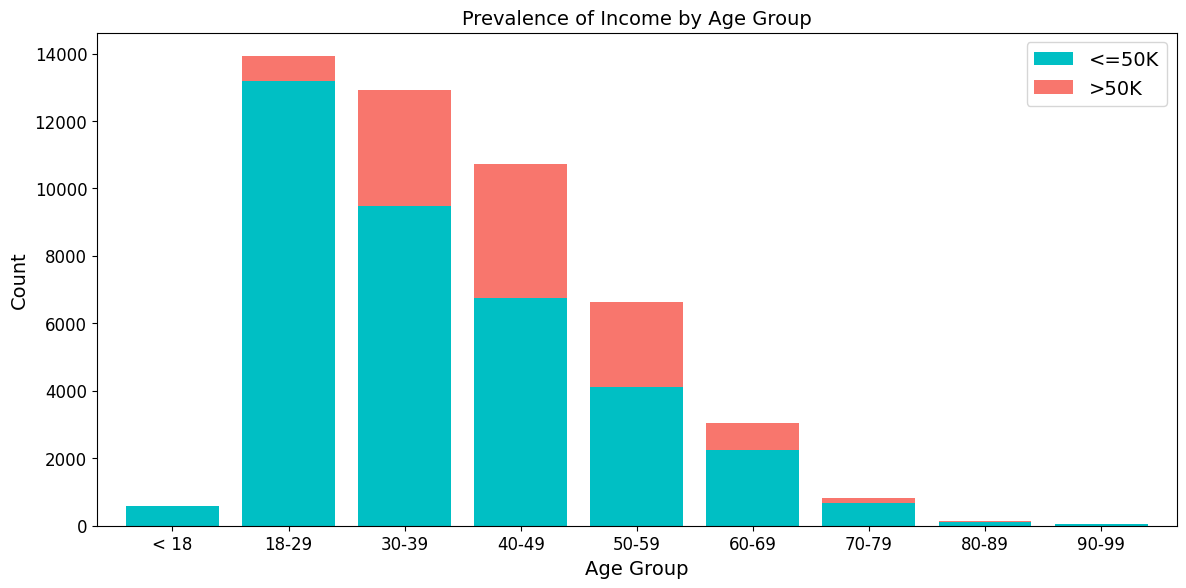


Crosstab for sex

sex         Male  Female  Total  Male_%  Female_%
age_group                                        
< 18         295     300    595   49.58     50.42
18-29       5707    8213  13920   41.00     59.00
30-39       3853    9076  12929   29.80     70.20
40-49       3188    7536  10724   29.73     70.27
50-59       1873    4746   6619   28.30     71.70
60-69        939    2115   3054   30.75     69.25
70-79        280     535    815   34.36     65.64
80-89         40      91    131   30.53     69.47
90-99         17      38     55   30.91     69.09
Total      16192   32650  48842   33.15     66.85


Crosstab for income

income     <=50K   >50K  Total  <=50K_%  >50K_%
age_group                                      
< 18         595      0    595   100.00    0.00
18-29      13174    746  13920    94.64    5.36
30-39       9468   3461  12929    73.23   26.77
40-49       6738   3986  10724    62.83   37.17
50-59       4110   2509   6619    62.09   37.91
60-69       2245    80

In [29]:
from eda_toolkit import stacked_crosstab_plot

# Call the stacked_crosstab_plot function
stacked_crosstabs = stacked_crosstab_plot(
    df=df,
    col="age_group",
    func_col=func_col,
    legend_labels_list=legend_labels_list,
    title=title,
    kind="bar",
    width=0.8,
    rot=0,  # axis rotation angle
    custom_order=None,
    color=["#00BFC4", "#F8766D"],  # default color schema
    output="both",
    return_dict=True,
    x=14,
    y=8,
    p=10,
    logscale=False,
    plot_type="regular",
    show_legend=True,
    label_fontsize=14,
    tick_fontsize=12,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    file_prefix="stacked_bar_non_normalized",
    save_formats=["png", "svg"],
)

## Regular Non-Stacked Bar Plots Example

Plot saved as ../images/png_images/unstacked_bar_sex.png
Plot saved as ../images/svg_images/unstacked_bar_sex.svg


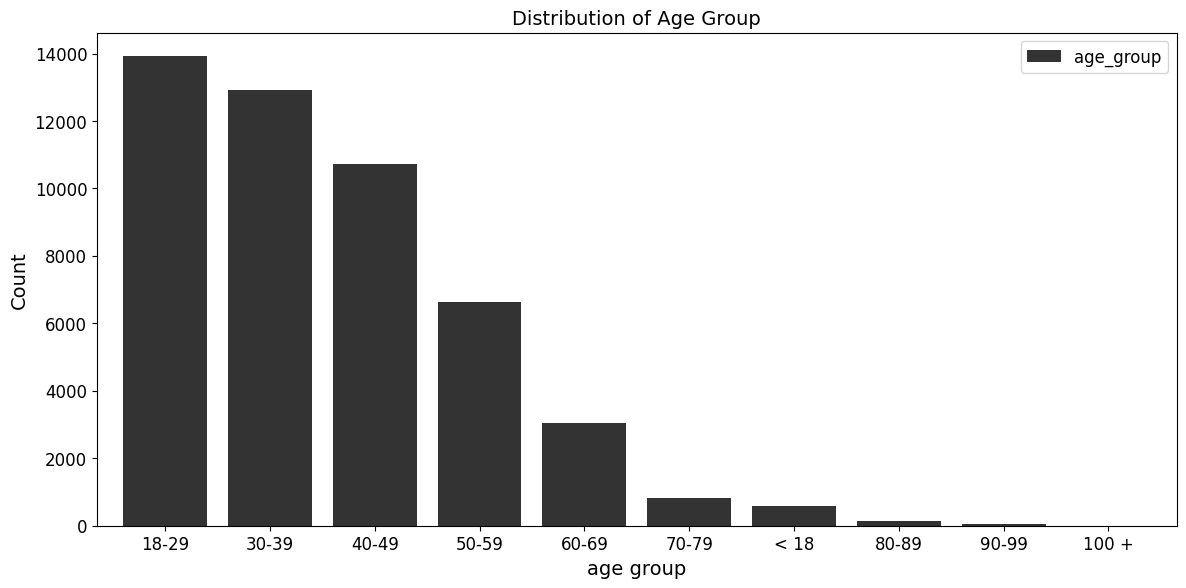

Plot saved as ../images/png_images/unstacked_bar_income.png
Plot saved as ../images/svg_images/unstacked_bar_income.svg


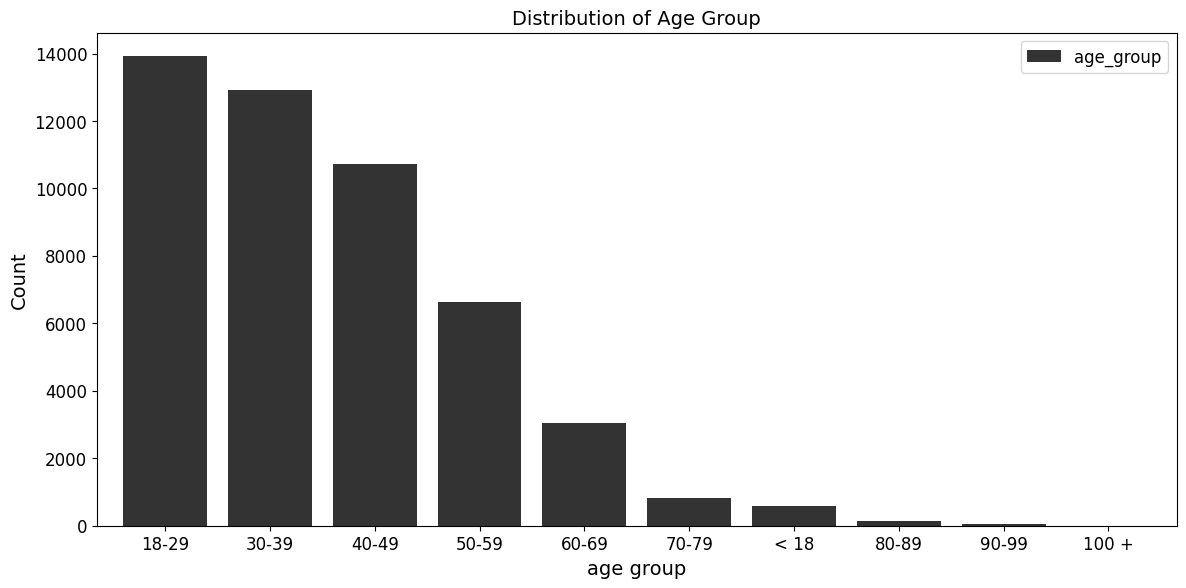


Crosstab for sex

sex         Male  Female  Total  Male_%  Female_%
age_group                                        
< 18         295     300    595   49.58     50.42
18-29       5707    8213  13920   41.00     59.00
30-39       3853    9076  12929   29.80     70.20
40-49       3188    7536  10724   29.73     70.27
50-59       1873    4746   6619   28.30     71.70
60-69        939    2115   3054   30.75     69.25
70-79        280     535    815   34.36     65.64
80-89         40      91    131   30.53     69.47
90-99         17      38     55   30.91     69.09
Total      16192   32650  48842   33.15     66.85


Crosstab for income

income     <=50K   >50K  Total  <=50K_%  >50K_%
age_group                                      
< 18         595      0    595   100.00    0.00
18-29      13174    746  13920    94.64    5.36
30-39       9468   3461  12929    73.23   26.77
40-49       6738   3986  10724    62.83   37.17
50-59       4110   2509   6619    62.09   37.91
60-69       2245    80

In [30]:
from eda_toolkit import stacked_crosstab_plot

# Call the stacked_crosstab_plot function
stacked_crosstabs = stacked_crosstab_plot(
    df=df,
    col="age_group",
    func_col=func_col,
    legend_labels_list=legend_labels_list,
    title=title,
    kind="bar",
    width=0.8,
    rot=0,  # axis rotation angle
    custom_order=None,
    color="#333333",
    output="both",
    return_dict=True,
    x=14,
    y=8,
    p=10,
    logscale=False,
    plot_type="regular",
    show_legend=True,
    label_fontsize=14,
    tick_fontsize=12,
    remove_stacks=True,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    file_prefix="unstacked_bar",
    save_formats=["png", "svg"],
)

## Box and Violin Plots

### Box Plots Grid Example

In [31]:
age_boxplot_list = df[
    [
        "education-num",
        "hours-per-week",
    ]
].columns.to_list()

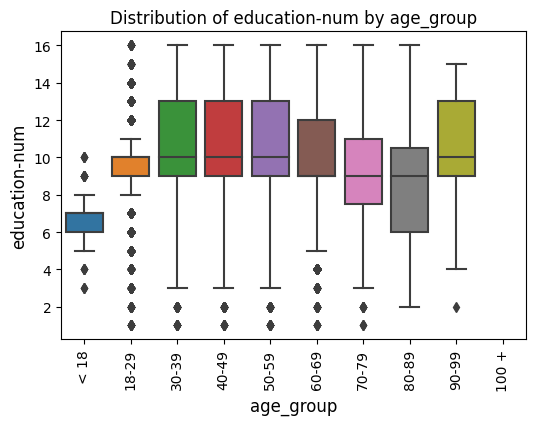

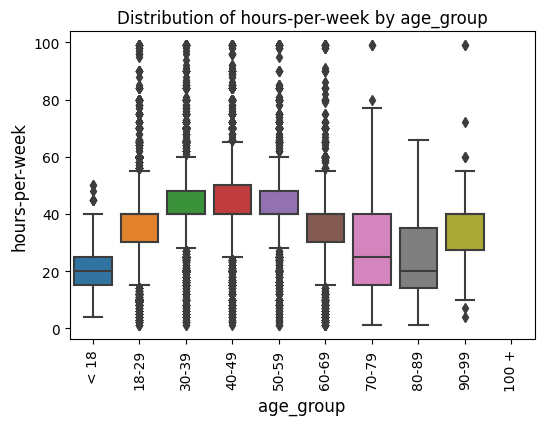

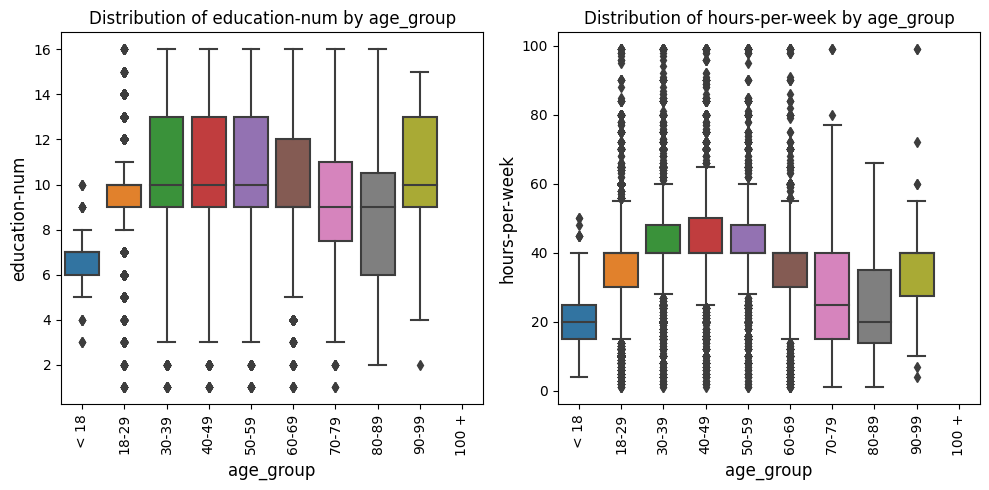

In [32]:
from eda_toolkit import box_violin_plot

metrics_comp = ["age_group"]

box_violin_plot(
    df=df,
    metrics_list=age_boxplot_list,
    metrics_comp=metrics_comp,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    save_plots=True,
    show_plot="both",
    show_legend=False,
    plot_type="boxplot",
    xlabel_rot=90,
)

### Violin Plots Grid Example

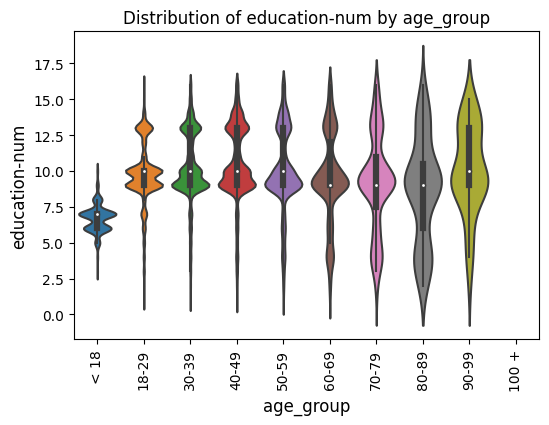

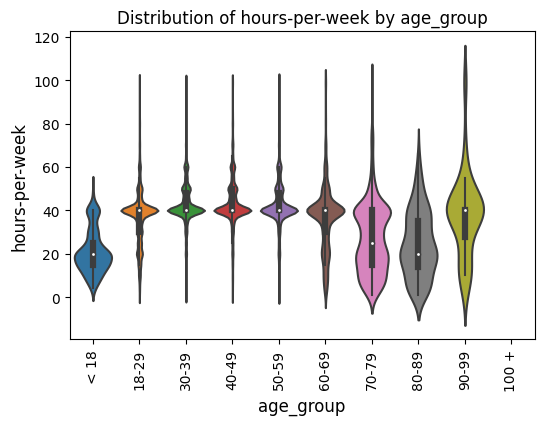

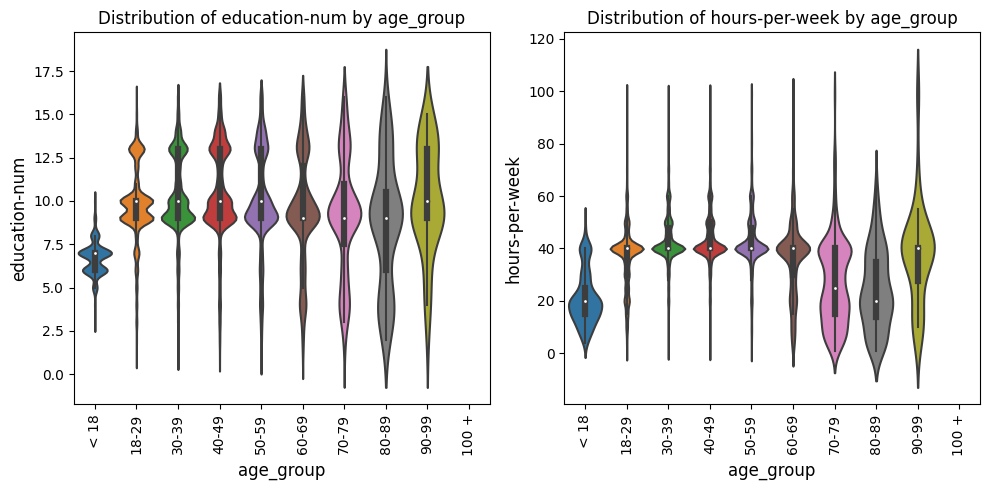

In [33]:
from eda_toolkit import box_violin_plot

metrics_comp = ["age_group"]

box_violin_plot(
    df=df,
    metrics_list=age_boxplot_list,
    metrics_comp=metrics_comp,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    # save_plots=True,
    show_plot="both",
    show_legend=False,
    plot_type="violinplot",
    xlabel_rot=90,
)

### Pivoted Violin Plots Grid Example

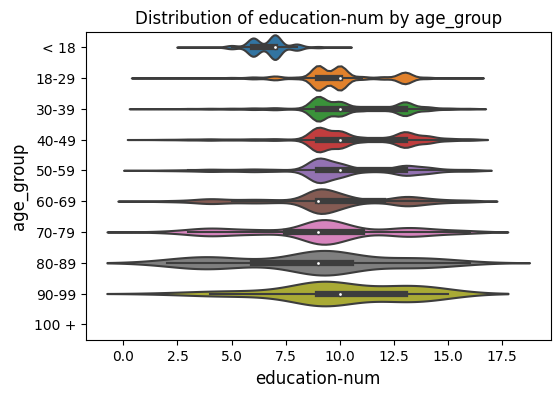

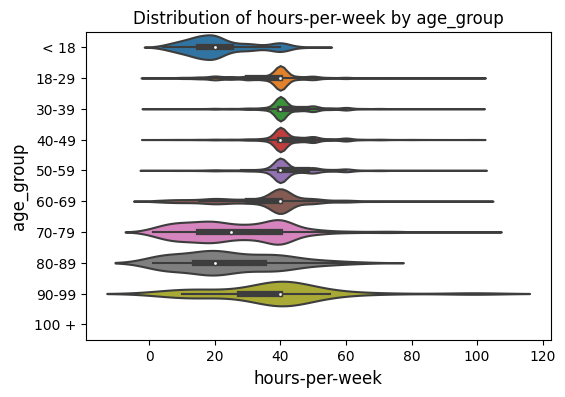

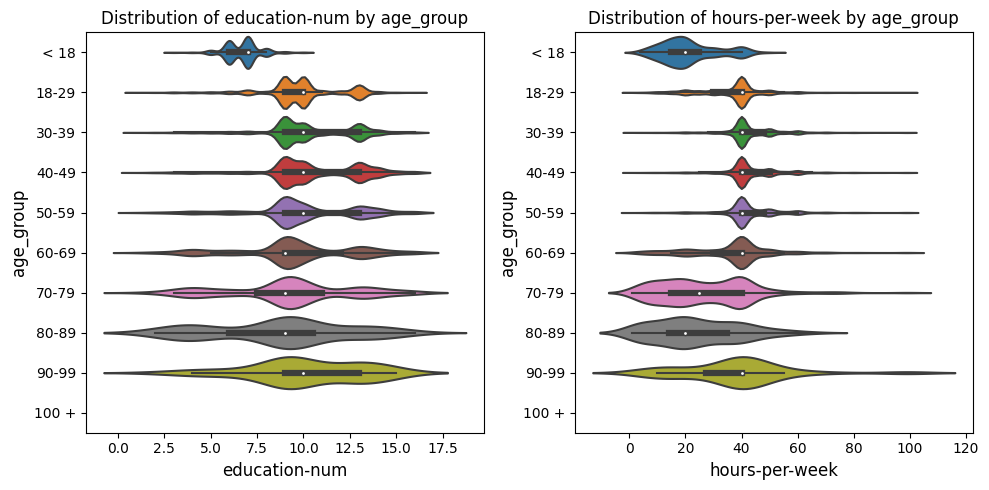

In [34]:
from eda_toolkit import box_violin_plot

metrics_comp = ["age_group"]

box_violin_plot(
    df=df,
    metrics_list=age_boxplot_list,
    metrics_comp=metrics_comp,
    show_plot="both",
    rotate_plot=True,
    show_legend=False,
    plot_type="violinplot",
    xlabel_rot=0,
)

## Scatter Plots and Best Fit Lines

### Regression-Centric Scatter Plots Example

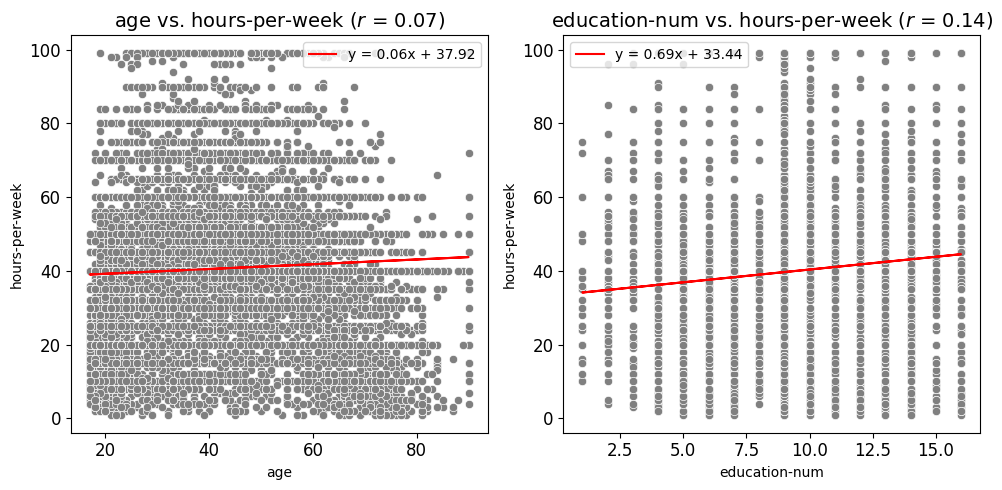

Saving grid plot: 100%|██████████| 1/1 [00:03<00:00,  3.99s/it]


In [35]:
from eda_toolkit import scatter_fit_plot

scatter_fit_plot(
    df=df,
    x_vars=["age", "education-num"],
    y_vars=["hours-per-week"],
    show_legend=True,
    show_plot="grid",
    grid_figsize=None,
    label_fontsize=14,
    tick_fontsize=12,
    add_best_fit_line=True,
    scatter_color="#808080",
    show_correlation=True,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    save_plots="all",
)

### Scatter Plots Grouped by Category Example

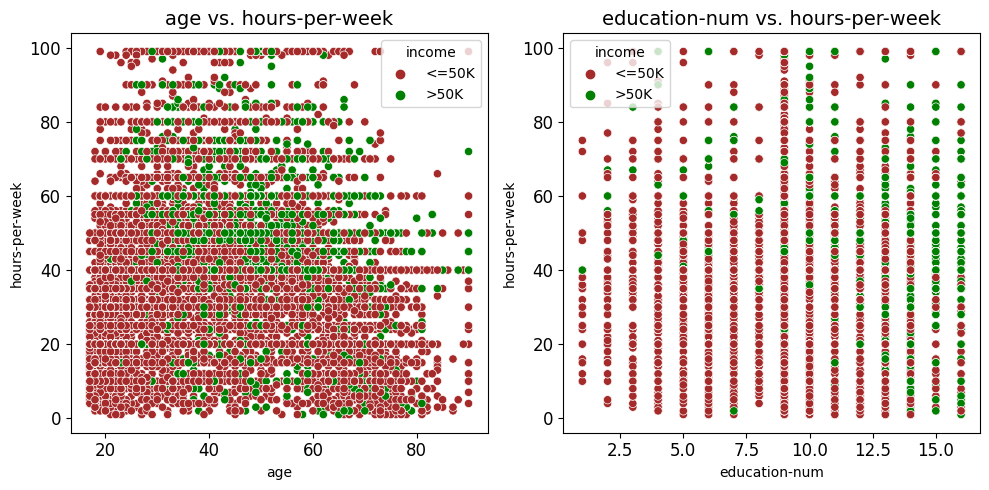

Saving grid plot: 100%|██████████| 1/1 [00:04<00:00,  4.21s/it]


In [36]:
from eda_toolkit import scatter_fit_plot

hue_dict = {"<=50K": "brown", ">50K": "green"}

scatter_fit_plot(
    df=df,
    x_vars=["age", "education-num"],
    y_vars=["hours-per-week"],
    show_legend=True,
    show_plot="grid",
    label_fontsize=14,
    tick_fontsize=12,
    add_best_fit_line=False,
    scatter_color="#808080",
    hue="income",
    hue_palette=hue_dict,
    show_correlation=False,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    save_plots="all",
)

### Scatter Plots (All Combinations Example)

In [37]:
## Reload dataframe since a ton of `data_doctor` columns were added from above;
## this would cause too many additional columns to loop through; not necessary
## for this reproducible example, especially when it comes to saving so many files
df = pd.read_csv(os.path.join(data_path, "adult_income.csv"))
df = df.drop(columns=["Unnamed: 0"])

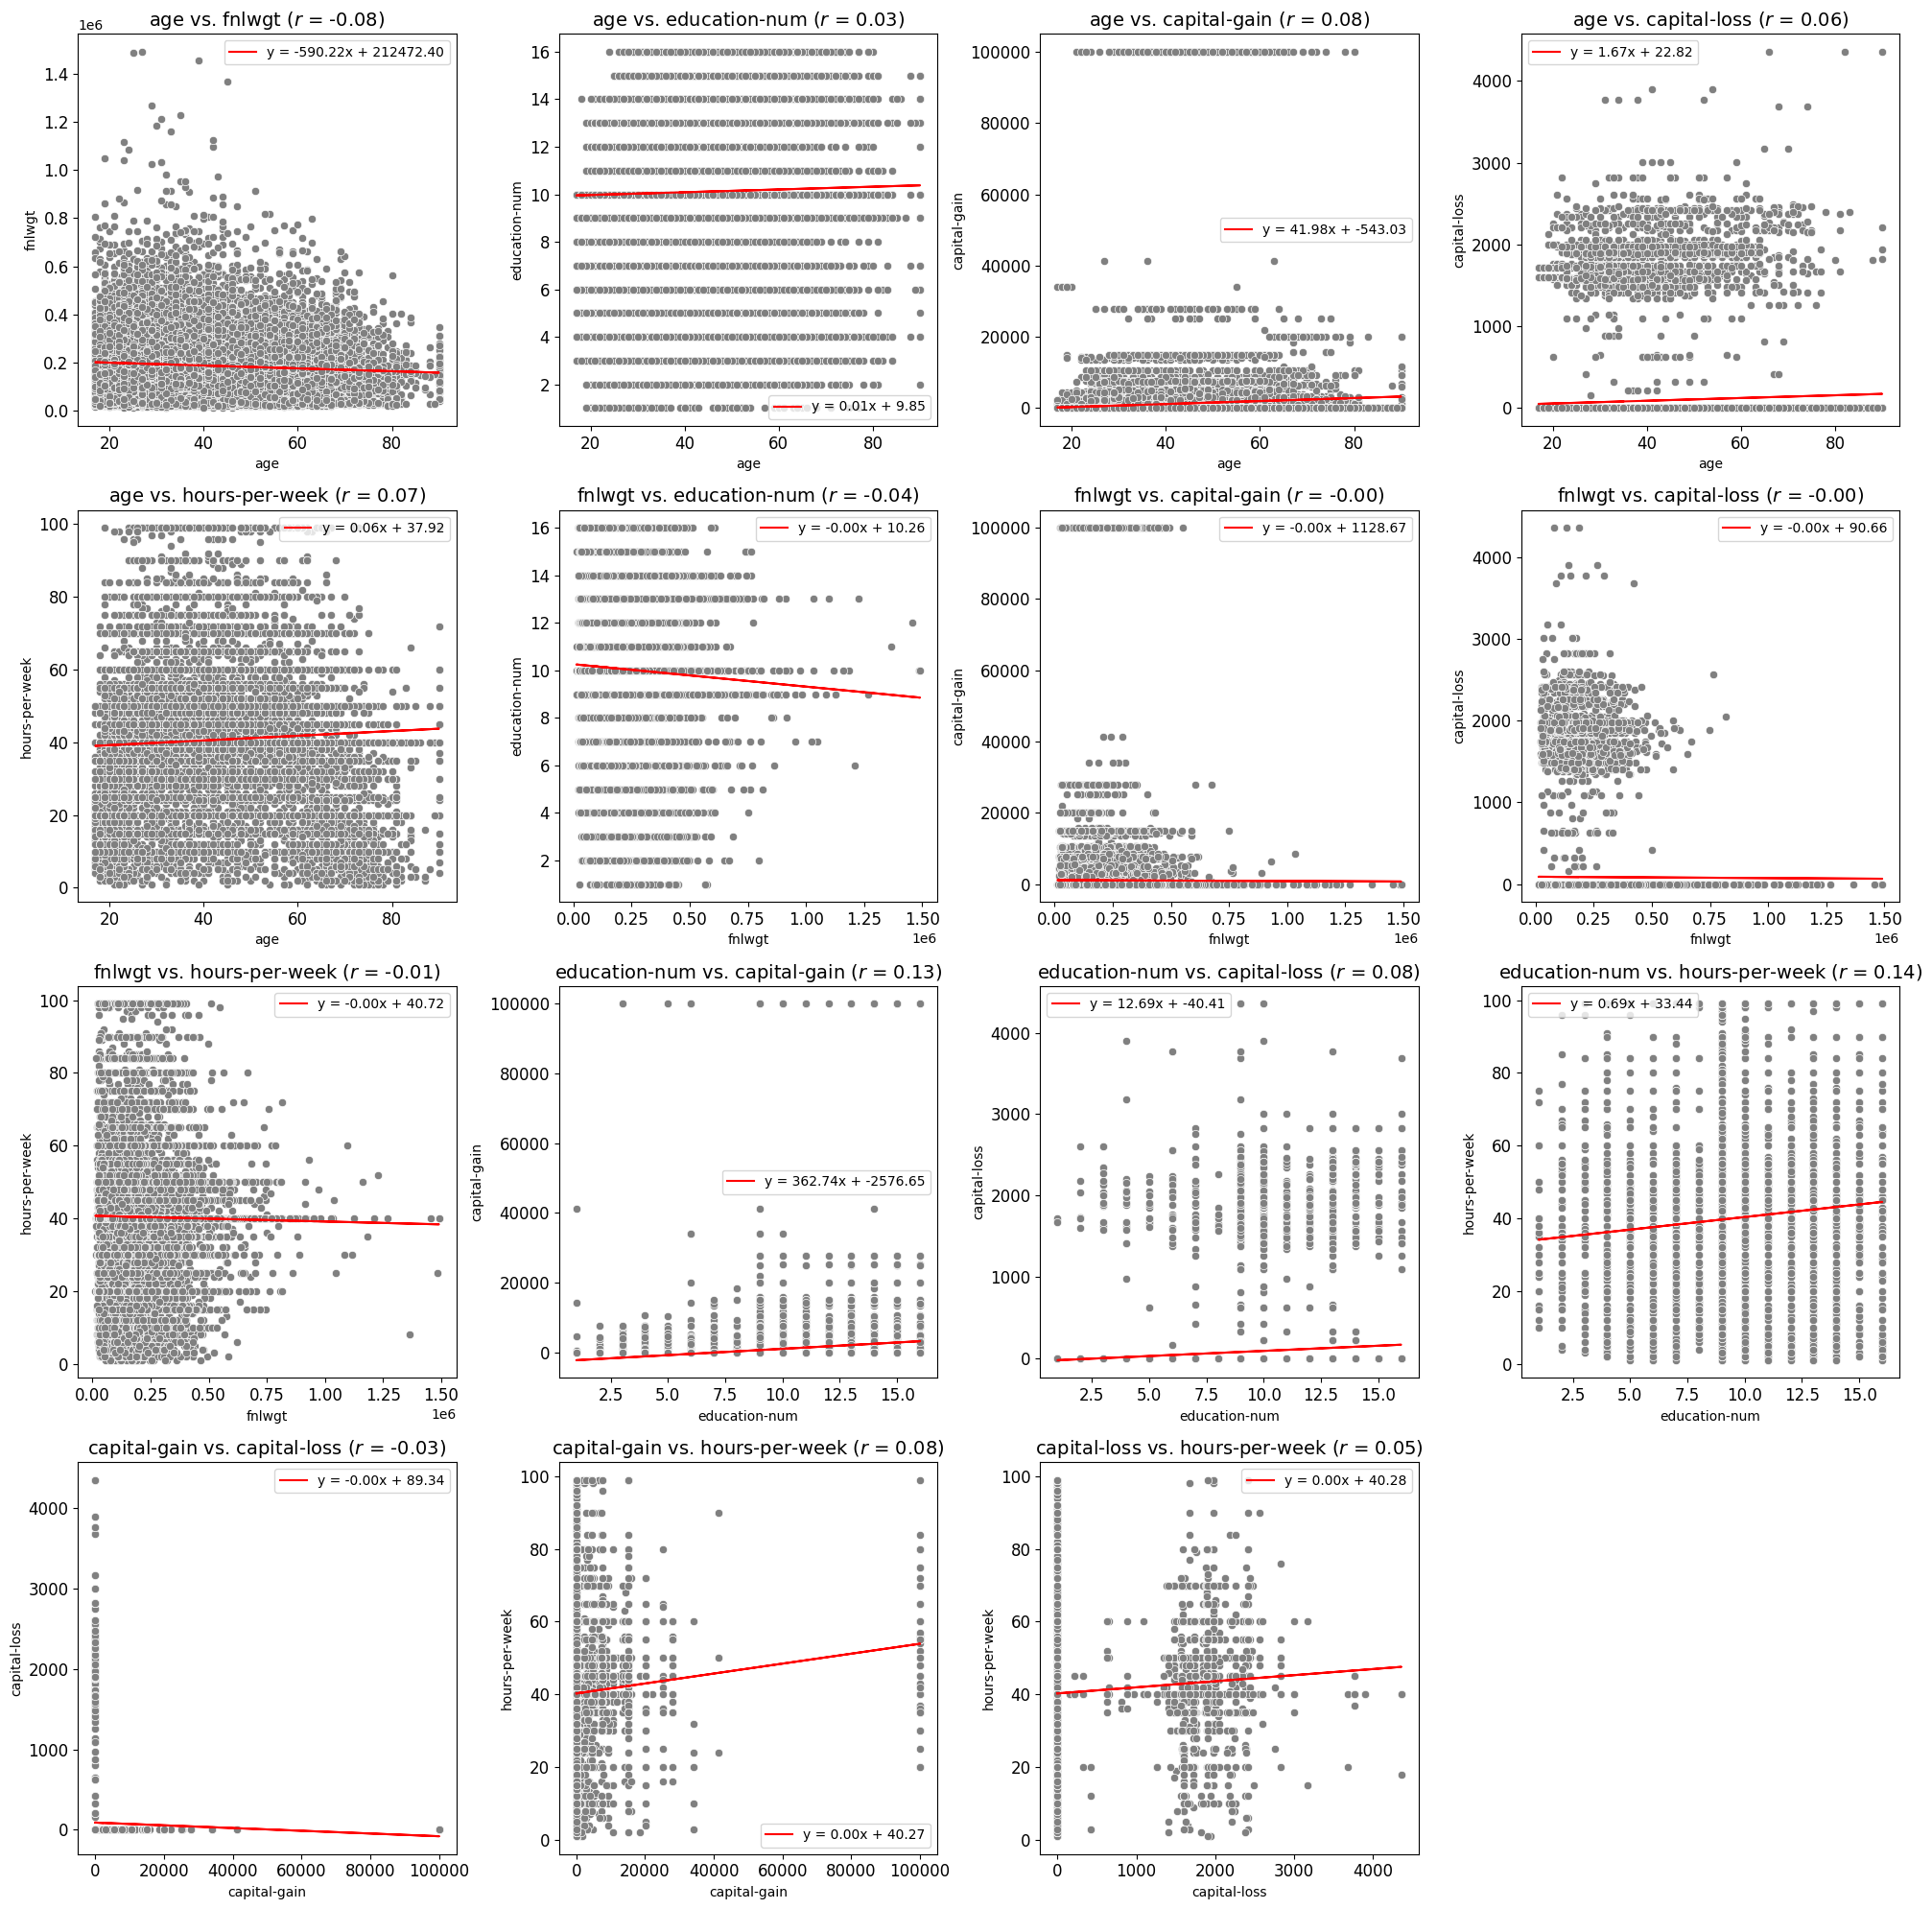

Saving grid plot: 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]


In [38]:
# from eda_toolkit import scatter_fit_plot

scatter_fit_plot(
    df=df,
    all_vars=df.select_dtypes(np.number).columns.to_list(),
    show_legend=True,
    show_plot="grid",
    label_fontsize=14,
    tick_fontsize=12,
    add_best_fit_line=True,
    scatter_color="#808080",
    show_correlation=True,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    save_plots="all",
)

## Correlation Matrices

### Triangular Correlation Matrix Example

In [39]:
# Select only numeric data to pass into the function
df_num = df.select_dtypes(np.number)

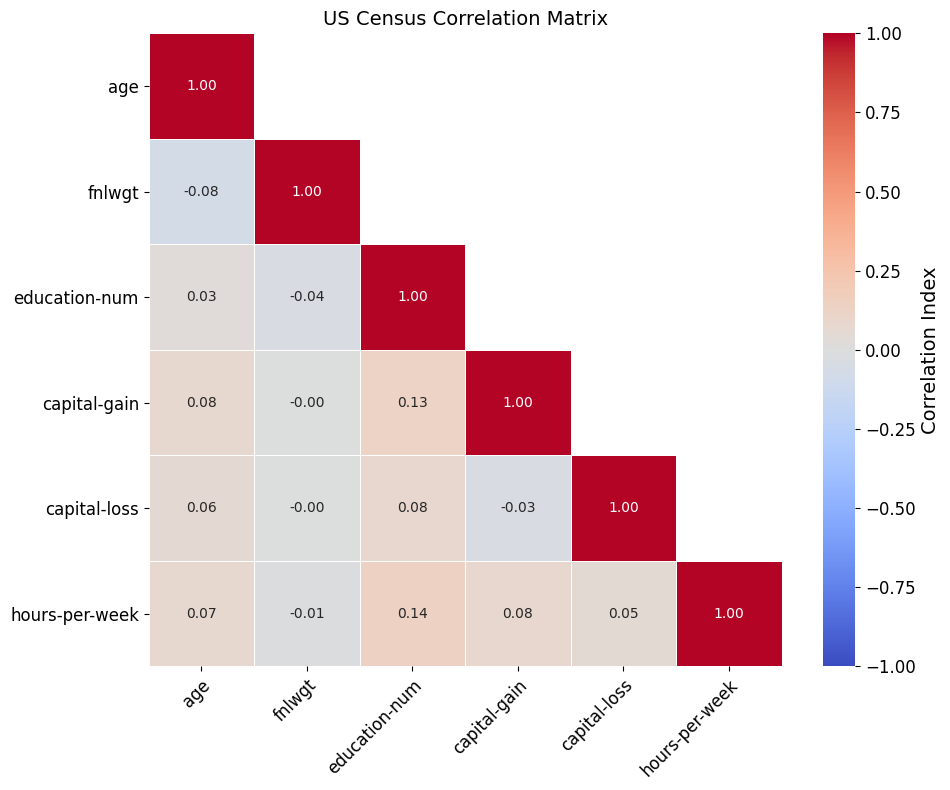

In [40]:
from eda_toolkit import flex_corr_matrix

flex_corr_matrix(
    df=df,
    cols=df_num.columns.to_list(),
    annot=True,
    cmap="coolwarm",
    figsize=(10, 8),
    title="US Census Correlation Matrix",
    xlabel_alignment="right",
    label_fontsize=14,
    tick_fontsize=12,
    xlabel_rot=45,
    ylabel_rot=0,
    text_wrap=50,
    vmin=-1,
    vmax=1,
    cbar_label="Correlation Index",
    triangular=True,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    save_plots=True,
)

### Full Correlation Matrix Example

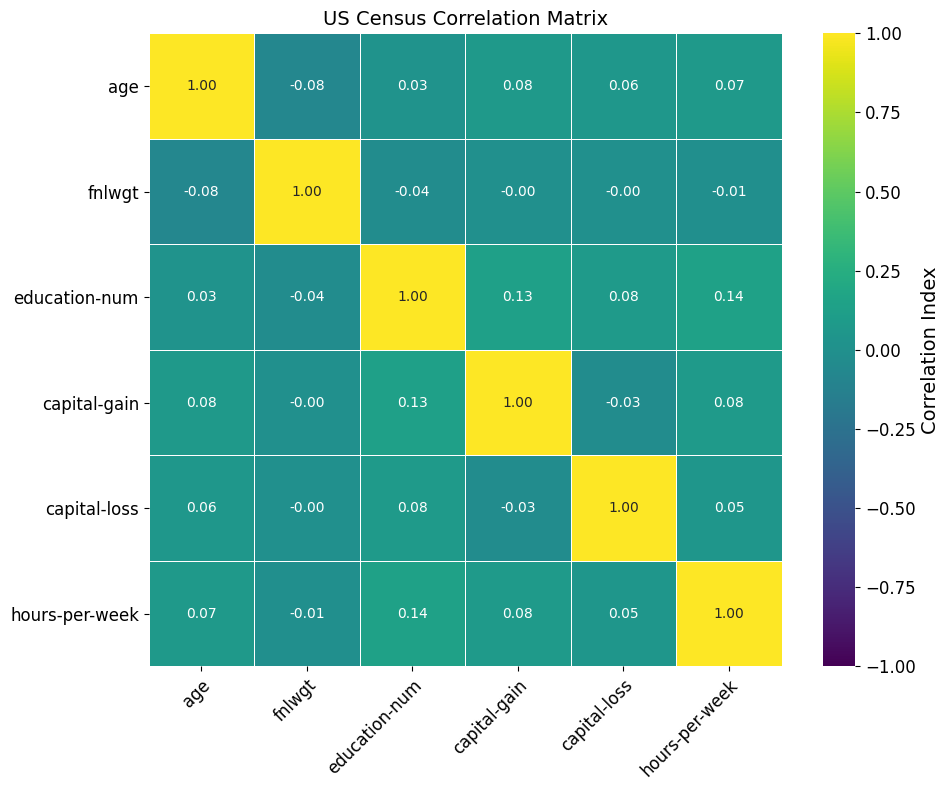

In [41]:
from eda_toolkit import flex_corr_matrix

flex_corr_matrix(
    df=df,
    cols=df_num.columns.to_list(),
    annot=True,
    cmap="viridis",
    figsize=(10, 8),
    title="US Census Correlation Matrix",
    xlabel_alignment="right",
    label_fontsize=14,
    tick_fontsize=12,
    xlabel_rot=45,
    ylabel_rot=0,
    text_wrap=50,
    vmin=-1,
    vmax=1,
    cbar_label="Correlation Index",
    triangular=False,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    save_plots=True,
)

## Partial Dependence Plots

### 2D Partial Dependence Plots

#### Fetch The CA Housing Dataset and Prepare The DataFrame

In [42]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd

# Load the dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)

#### Split The Data Into Training and Testing Sets

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    df, data.target, test_size=0.2, random_state=42
)

#### Train a GradientBoostingRegressor Model

In [44]:
model = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    loss="huber",
    random_state=42,
)
model.fit(X_train, y_train)

GradientBoostingRegressor(loss='huber', max_depth=4, random_state=42)

#### Create 2D Partial Dependence Plot Grid

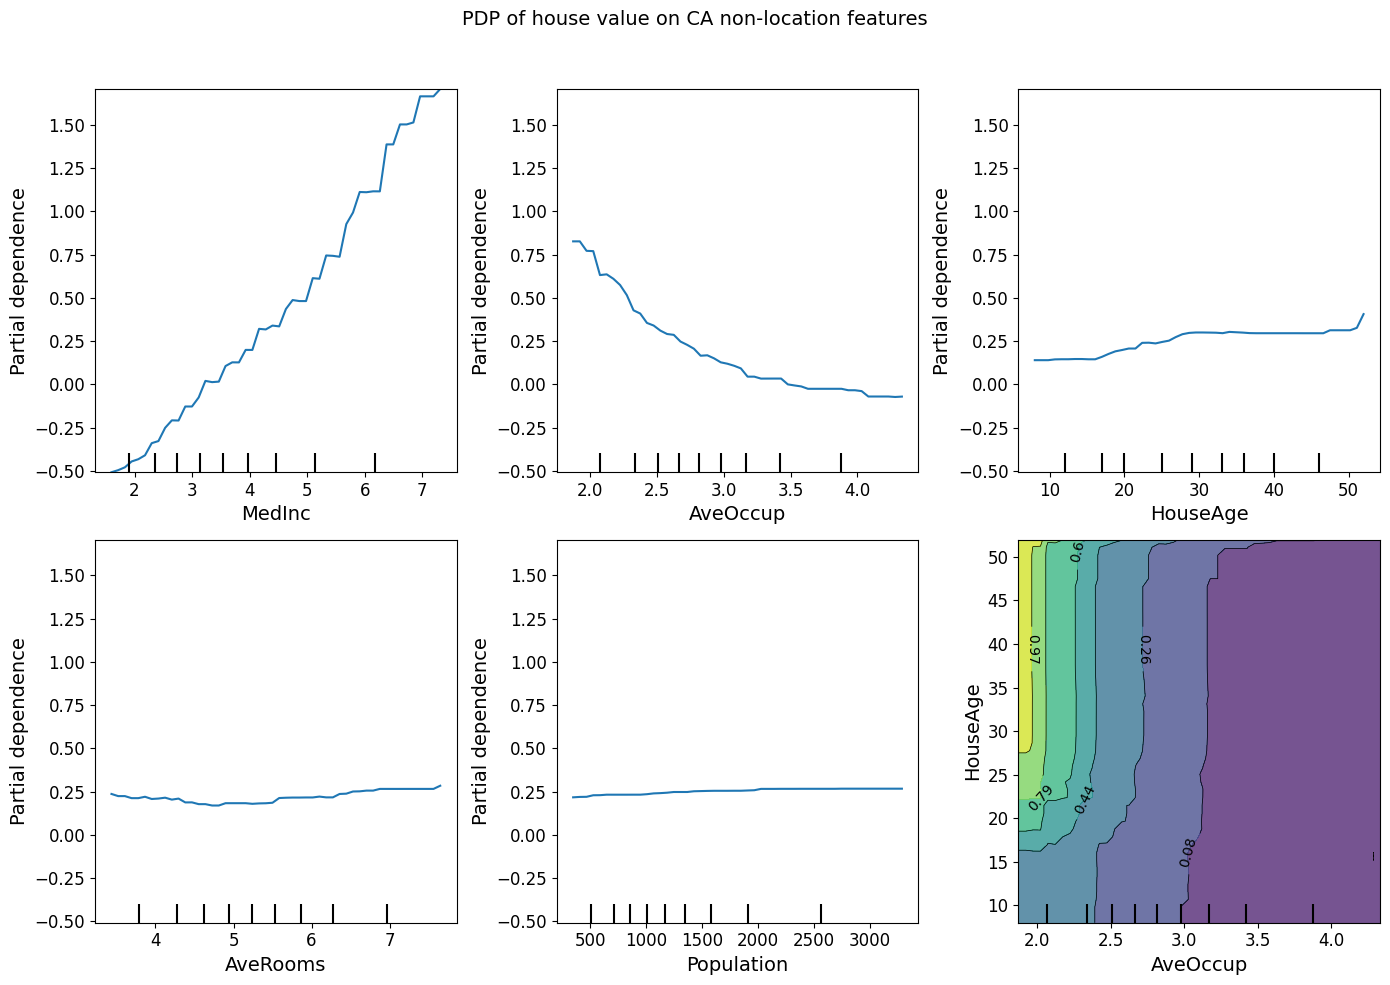

In [45]:
# import the plot_2d_pdp function from
# the eda_toolkit library
from eda_toolkit import plot_2d_pdp

# Feature names
names = data.feature_names

# Generate 2D partial dependence plots
plot_2d_pdp(
    model=model,
    X_train=X_train,
    feature_names=names,
    features=[
        "MedInc",
        "AveOccup",
        "HouseAge",
        "AveRooms",
        "Population",
        ("AveOccup", "HouseAge"),
    ],
    title="PDP of house value on CA non-location features",
    grid_figsize=(14, 10),
    individual_figsize=(12, 4),
    label_fontsize=14,
    tick_fontsize=12,
    text_wrap=120,
    plot_type="grid",
    image_path_png=image_path_png,
    save_plots="all",
)

### 3D Partial Dependence Plots

#### Static Plot

#### Fetch The CA Housing Dataset and Prepare The DataFrame

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)

#### Split The Data Into Training and Testing Sets

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    df, data.target, test_size=0.2, random_state=42
)

#### Train a GradientBoostingRegressor Model

In [48]:
model = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    loss="huber",
    random_state=1,
)
model.fit(X_train, y_train)

GradientBoostingRegressor(loss='huber', max_depth=4, random_state=1)

#### Create Static 3D Partial Dependence Plot

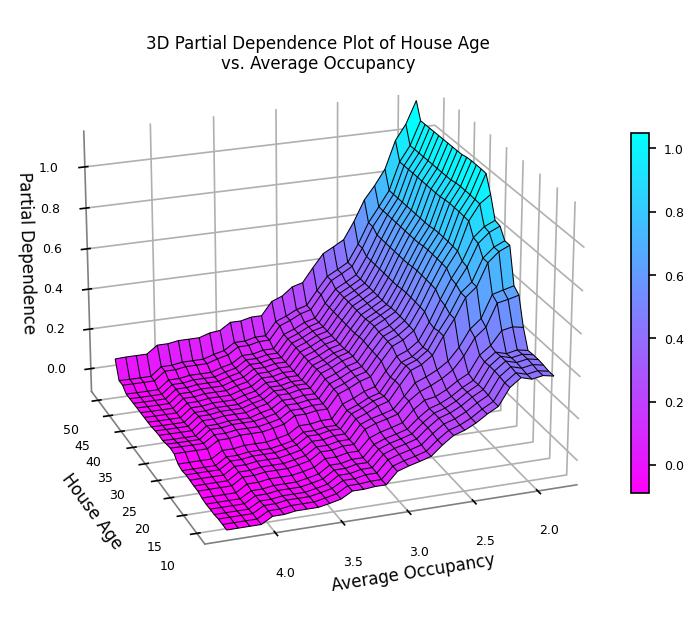

In [49]:
# import the plot_3d_pdp function from
# the eda_toolkit library
from eda_toolkit import plot_3d_pdp

# Call the function to generate the plot
plot_3d_pdp(
    model=model,
    dataframe=X_test,  # Use the test dataset
    feature_names_list=["HouseAge", "AveOccup"],
    x_label="House Age",
    y_label="Average Occupancy",
    z_label="Partial Dependence",
    title="3D Partial Dependence Plot of House Age vs. Average Occupancy",
    image_filename="3d_pdp",
    plot_type="static",
    figsize=[8, 5],
    text_wrap=40,
    wireframe_color="black",
    image_path_png=image_path_png,
    grid_resolution=30,
)

#### Interactive Plot

In [50]:
# import the plot_3d_pdp function from
# the eda_toolkit library
from eda_toolkit import plot_3d_pdp

# Call the function to generate the plot
plot_3d_pdp(
    model=model,
    dataframe=X_test,  # Use the test dataset
    feature_names_list=["HouseAge", "AveOccup"],
    x_label="House Age",
    y_label="Average Occupancy",
    z_label="Partial Dependence",
    title="3D Partial Dependence Plot of House Age vs. Average Occupancy",
    html_file_path=image_path_png,
    image_filename="3d_pdp",
    html_file_name="3d_pdp.html",
    plot_type="interactive",
    text_wrap=80,
    zoom_out_factor=1.2,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    grid_resolution=30,
    label_fontsize=8,
    tick_fontsize=6,
    title_x=0.38,
    top_margin=10,
    right_margin=50,
    left_margin=50,
    cbar_x=0.9,
    cbar_thickness=25,
    show_modebar=False,
    enable_zoom=True,
)